# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
flights = pd.read_csv(url)


In [2]:
# import seaborn
import seaborn as sns
from matplotlib import pyplot as plt

# import numpy
import numpy as np

In [3]:
flights.head()

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3      1576     5      45  2013-01-01T10:00:00Z  
4       762     6       0  2013-01-01T11:00:00Z

In [4]:
# number of flights for each different type of carrier

carriers = flights.carrier.value_counts()
carriers


UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

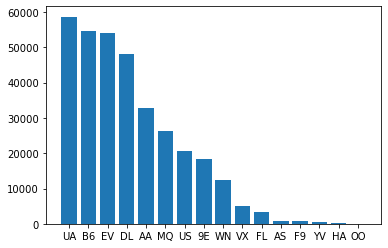

In [5]:
plt.bar(x = carriers.index, height = carriers.values)
plt.show()

# Here the bar plot depicts the different carriers(x axis) and the number of flights associated with those carriers(y axis)

Text(0.5, 1.0, 'flights Data Counts by Carriers')

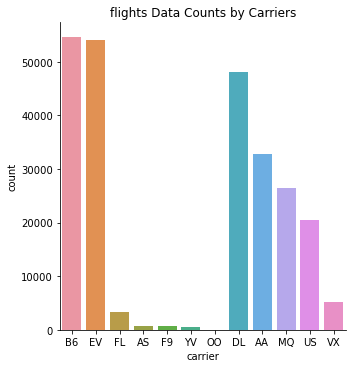

In [6]:
plot = sns.catplot(data= flights, kind = 'count', x = 'carrier', order=['B6', 'EV','FL', 'AS', 'F9', 'YV', 'OO', 'DL', 'AA', 'MQ', 'US', 'VX'])
plot.ax.set_title('flights Data Counts by Carriers')

# Through the catplot we can order the carrier categories in our own way by including only the categories we want and the way they are to be ordered in the order set
# The Kind parameter with the count as value counts the number of flights associated with the carriers

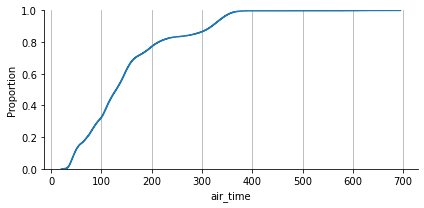

In [7]:
# displot shows the distribution of 'air_time' using histogram as kind which is looking difficult to predict the values.
plot = sns.displot(data = flights, x= 'air_time', kind = 'hist', height=3 ,aspect=2)
plot.ax.grid(axis = 'x')

# Here the kernel density estimation(kde) uses the 'air_time' data to estimate its density probability and present the data in the form of smooth curves which is little easy to predict the values distribution. 
plot = sns.displot(data = flights, x= 'air_time', kind = 'kde', height= 3, aspect = 2)
plot.ax.grid(axis = 'x')

# Here Empirical cumulative distribution function(ecdf) uses the 'air_time' data and present the proportion of observations that falls under each unique value in a dataset without any adjustments.
plot = sns.displot(data = flights, x= 'air_time', kind = 'ecdf', height= 3, aspect = 2)
plot.ax.grid(axis = 'x')

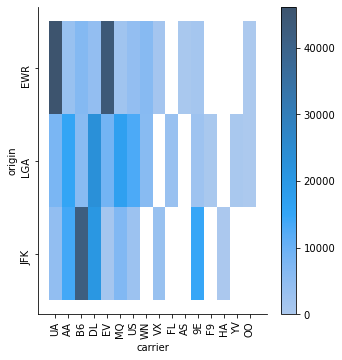

In [8]:
# Here the plot uses two datasets(bivariate)- 'carrier','origin' and presents the data accordingly
# The darker shade corresponds to the highest number of flights under the carrier and the origin, where as the light shade corresponds to the lowest and the whitespaces are regarded as empty(no flights with the carrier and origin match) 
plot = sns.displot(flights, x="carrier", y="origin", cbar = True)
plot.ax.tick_params(labelrotation = 90)

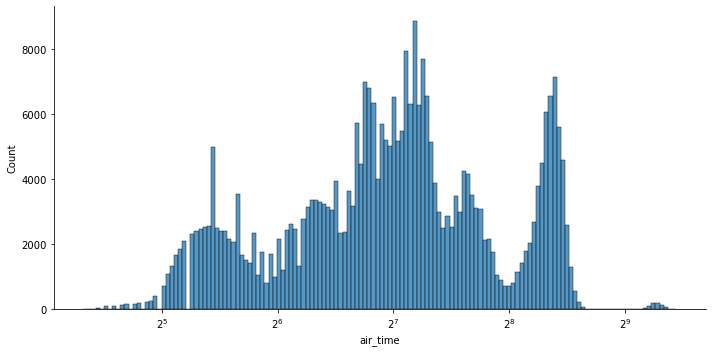

In [9]:
plot = sns.displot(flights, x= 'air_time', kind = 'hist', log_scale = 2, aspect=2)
# We can use log scale to represent the plot more clearly so that we can analyze the data easily. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


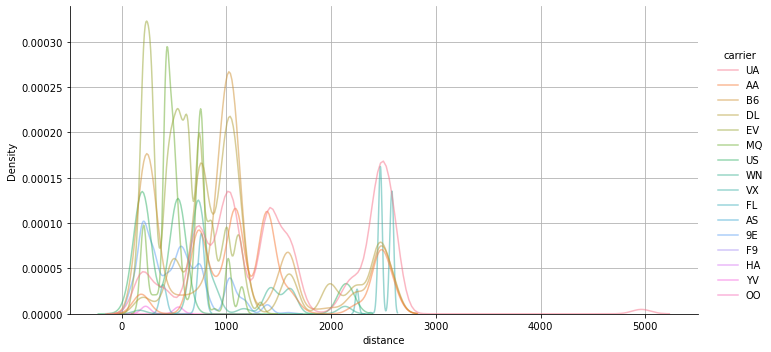

In [10]:
# This form of plot is also more understandable with the use of hue parameter that maps the categories with different colors
plot= sns.displot(data=flights, kind="kde", x="distance", hue = 'carrier', aspect=2, alpha=0.5)
plot.ax.grid()

In [11]:
plot= sns.displot(data=flights, kind="ecdf", x="carrier", hue = 'origin', aspect = 1.5)
plot.ax.set_yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plot.ax.grid()
# we can also use ticks inorder to specify the x or y co-ordinate points. 

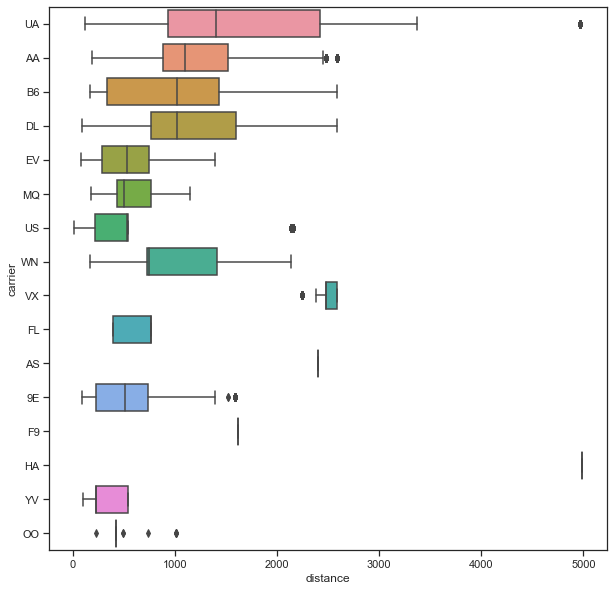

In [12]:
sns.set(rc={"figure.figsize":(10, 10)}) # specifies the size of the figure width=10, height=10
sns.set_style('ticks')
plot = sns.boxplot(y = 'carrier', x = 'distance', data = flights )
# the box plot visualizes the data more efficiently by displaying the quartiles and median intervals of the dataset. It also presents us with outliers if there are any.

<AxesSubplot:xlabel='carrier', ylabel='air_time'>

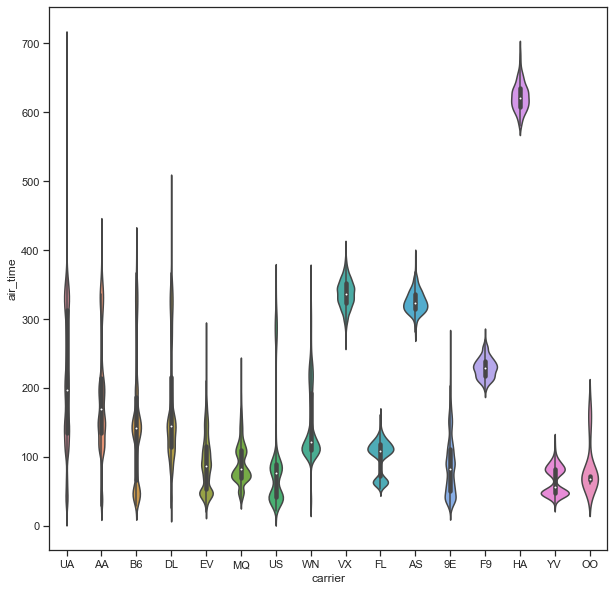

In [13]:
sns.violinplot(data = flights, x= 'carrier', y = 'air_time')
# violinplot is similar to boxplot but more attractive way to visualize multiple dataset distribution by using kernel density estimation.

In [14]:
sns.scatterplot(data = flights, x="carrier", y="distance", hue='origin')
# scatterplot plots the relationship between 'carrier' and 'distance' using 'origin' as hue parameter.

<AxesSubplot:xlabel='carrier', ylabel='distance'>

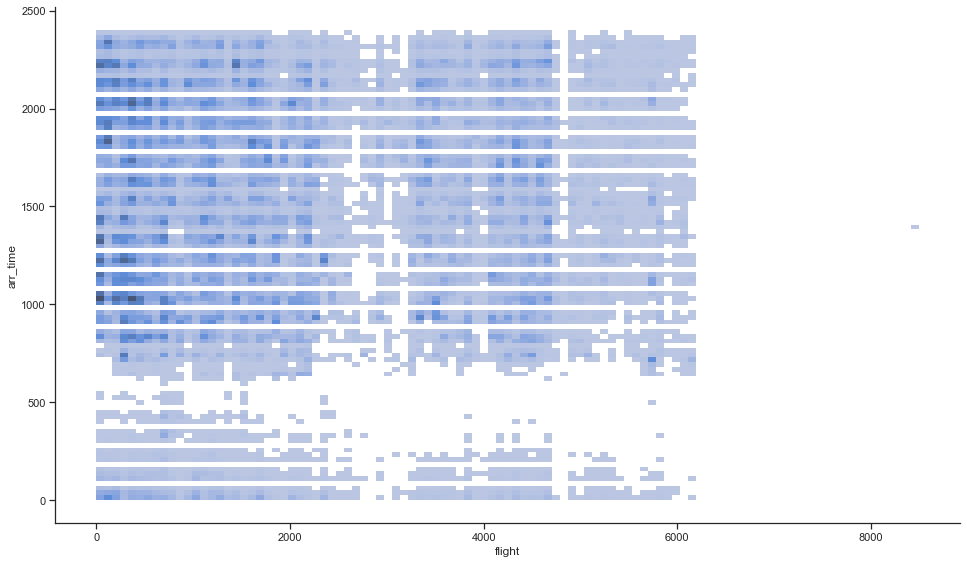

In [15]:
sns.displot(data = flights, x="flight", y="arr_time", height= 8, aspect= 1.7)
# Here the variables used are of form continous numeric values(flight and air_time) and this displot makes it little easier to get the insights from the data. 
# we can also include logscale to analyze the data more clearly 
# sns.displot(data = flights, x="flight", y="arr_time", height= 8, aspect= 1.7, log_scale= 2)


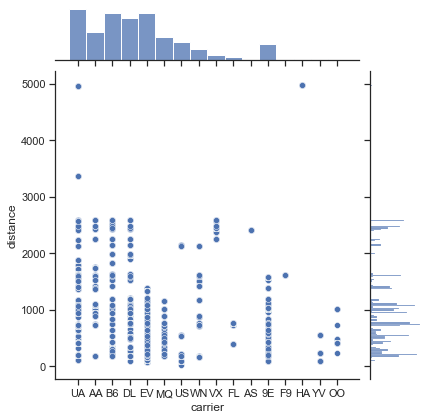

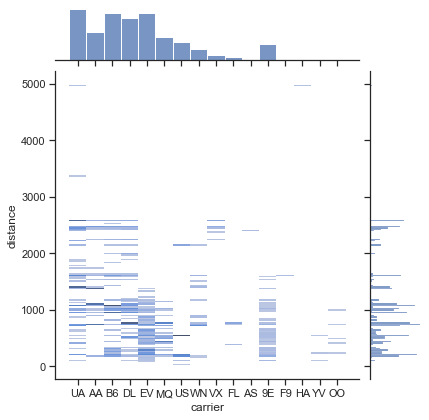

In [16]:
sns.jointplot(data=flights, x="carrier", y="distance") 
sns.jointplot(data=flights, x="carrier", y="distance", kind='hist')
# The jointplot presents a plot of two variables(carrier, distance) with both bivariate(inside the margin) and univariate graphs(on the margin).

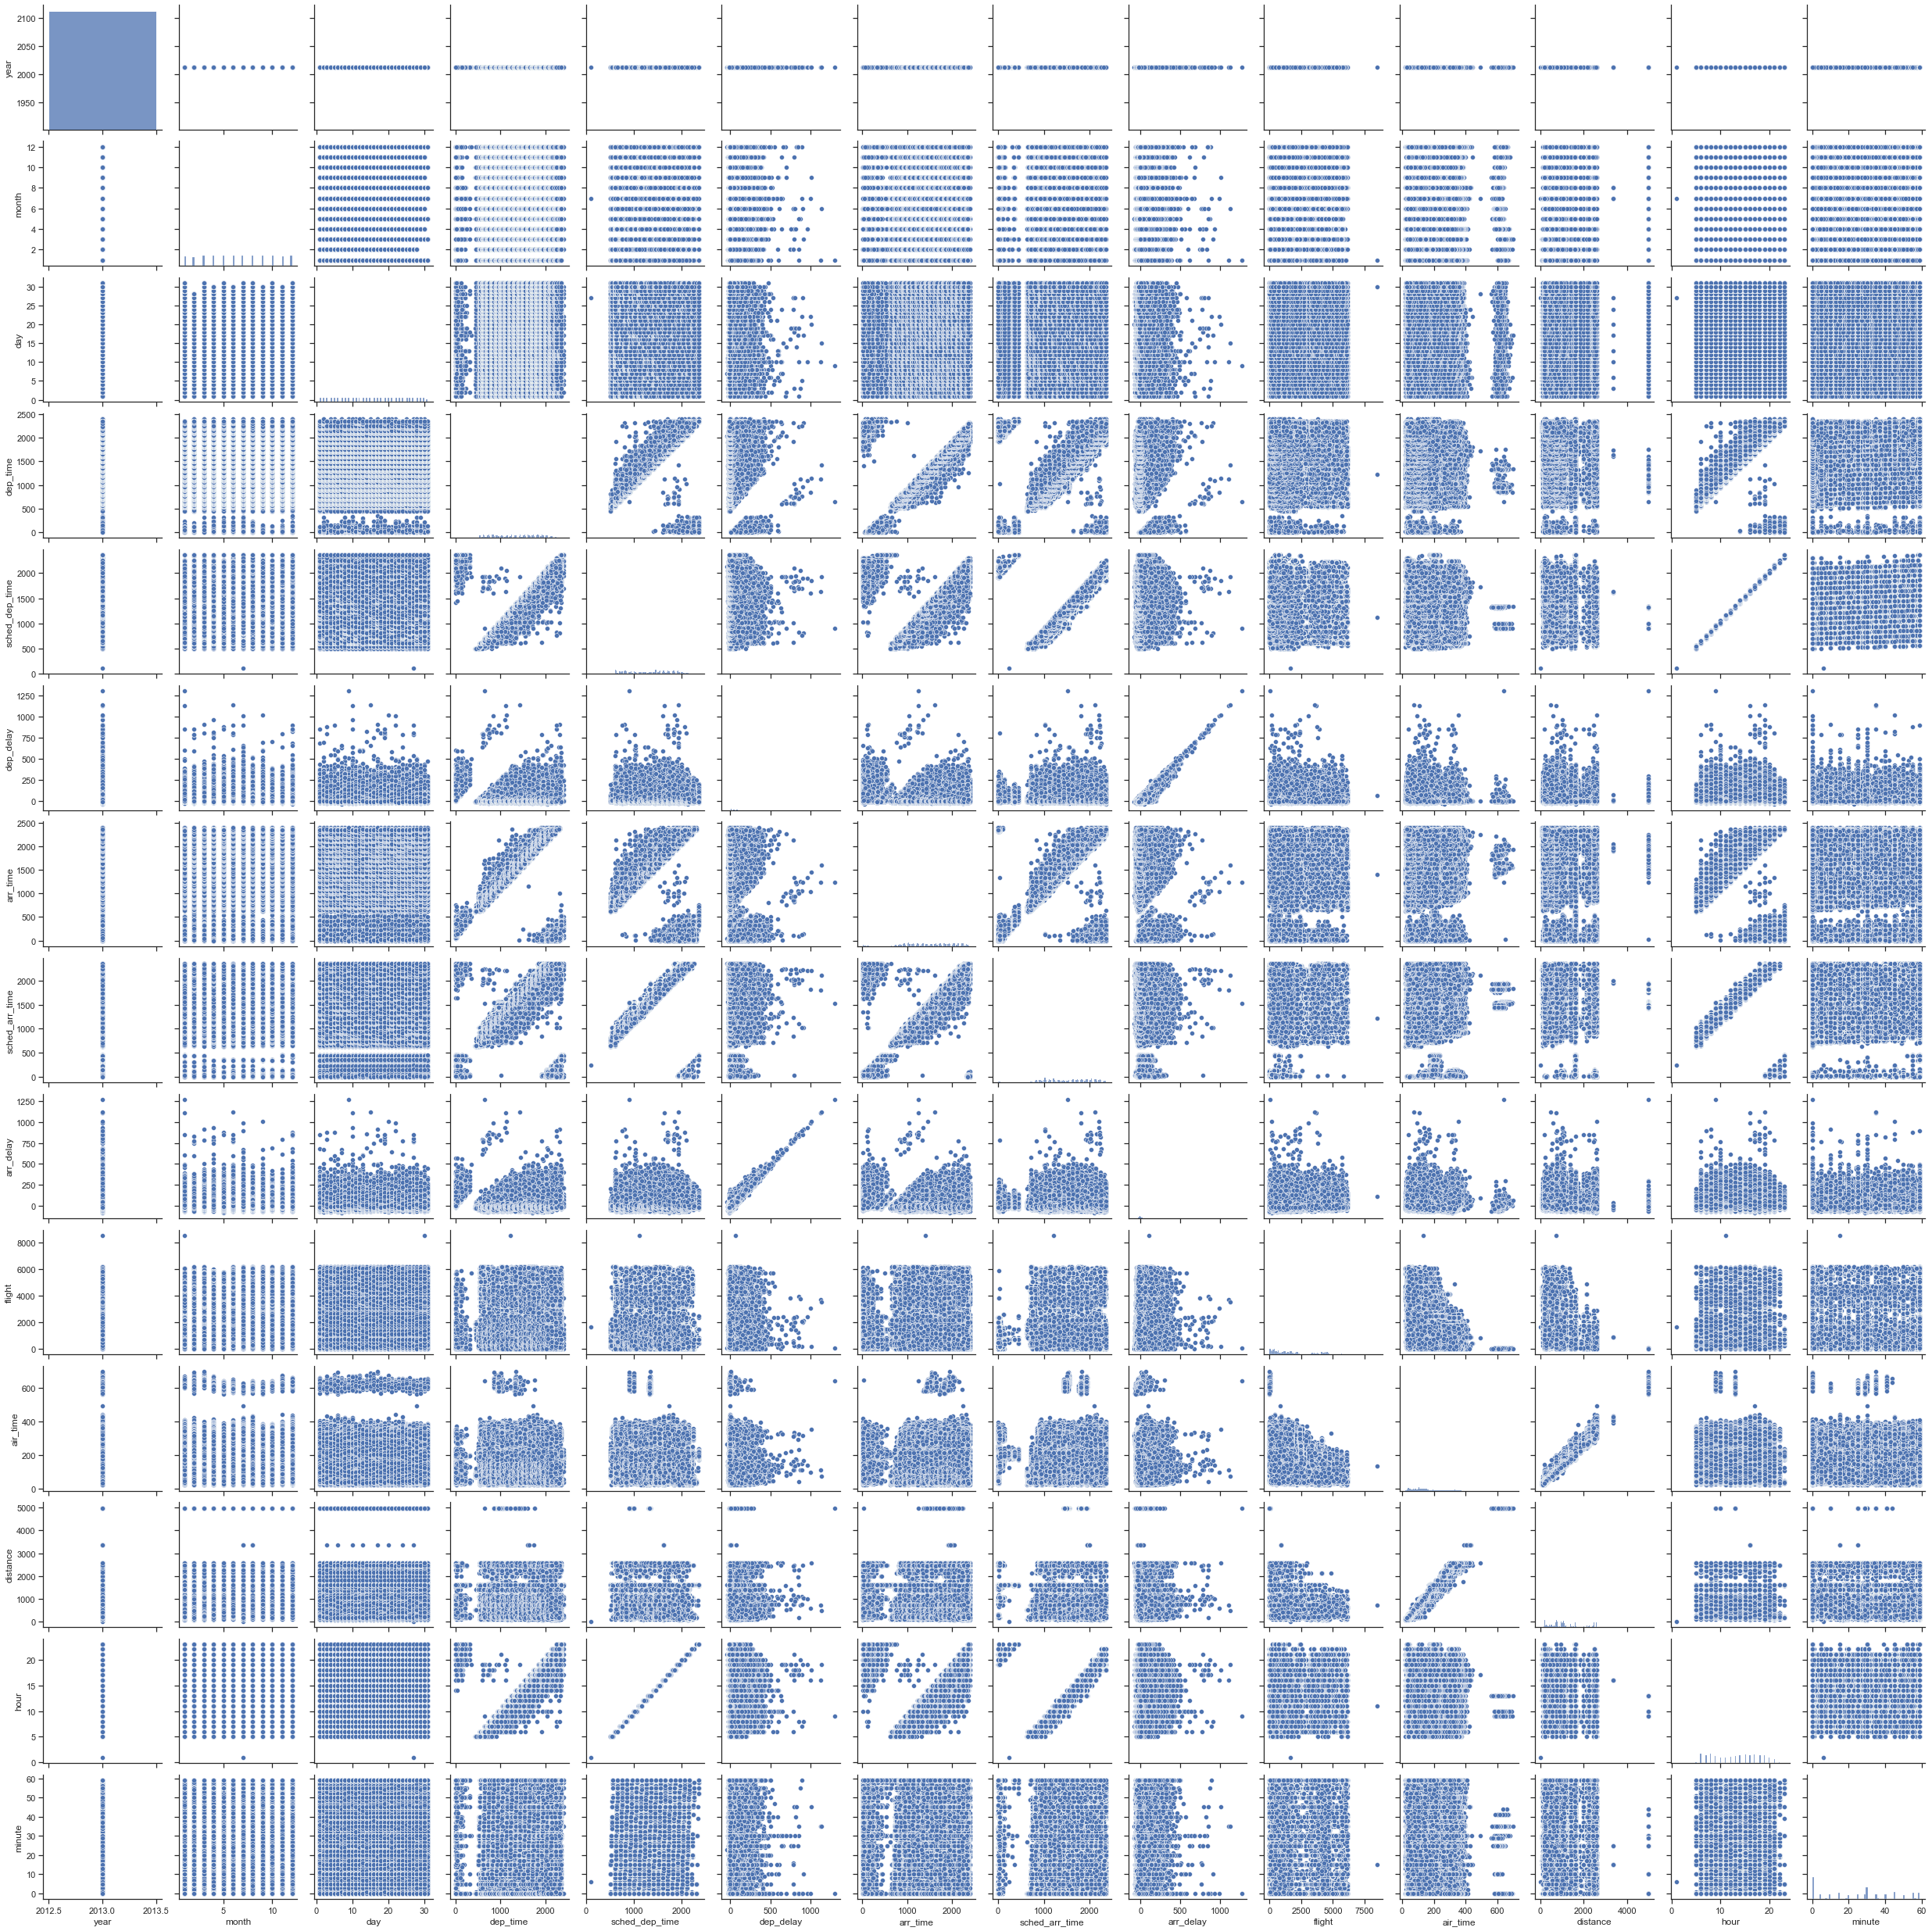

In [17]:
sns.pairplot(flights)
# The pairplot presents us with pairwise relationships in a dataset(flights).
# It considers all the numeric variable data from the dataset on both x axis and y axis as grid and presents the different possible graphs.  

In [18]:
# From my Experimentation and Observation on different plots 
# I felt that an idea on the dataset we are using is really important.
# Atleast basic things like the column values, its data types, whether there are any dependencies or not.
# Because if we are to gain insights from dataset using the correct variables and the appropriate form of plot that could best interpret the data are necessary.      
# EDA involves steps of Data collection, cleaning, preprocessing and visualization. All of those things are possible to achieve when we have idea on what kind of data we are collecting and the purpose of transforming it.